# Trigram model

In [1]:
words = open('../data/names.txt', 'r').read().splitlines()

In [2]:
' '.join(words[0:3])

'emma olivia ava'

In [3]:
# build training data set

In [4]:
block_size = 3
for w in words[0:3]:
    context = ['.'] * block_size
    for y in list(w):
        print(context, y)
        context = context[1: ] + [y]

['.', '.', '.'] e
['.', '.', 'e'] m
['.', 'e', 'm'] m
['e', 'm', 'm'] a
['.', '.', '.'] o
['.', '.', 'o'] l
['.', 'o', 'l'] i
['o', 'l', 'i'] v
['l', 'i', 'v'] i
['i', 'v', 'i'] a
['.', '.', '.'] a
['.', '.', 'a'] v
['.', 'a', 'v'] a


In [5]:
vocabs = sorted(set(list(''.join(words)))) + ['.']
itoc = dict(enumerate(vocabs))
ctoi = {v:k for k,v in itoc.items()}
itoc[0], ctoi['a']

('a', 0)

In [6]:
import torch
import random

random.shuffle(words)

In [7]:
def build_dataset(words):
    random.shuffle(words)
    block_size = 3
    X, Y = [], []
    for w in words:
        w = list(w) + ['.']
        context = [ctoi['.']] * block_size
        for y in w:
            X.append(context)
            Y.append(ctoi[y])
            context = context[1: ] + [ctoi[y]]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

X, Y = build_dataset(words)
n1 = int(X.shape[0] * 0.8) 
n2 = int(X.shape[0] * 0.9)
Xtr, Ytr = X[:n1], Y[:n1]
Xdev, Ydev = X[n1:n2], Y[n1:n2]
Xtest, Ytest = X[n2:], Y[n2:]

In [8]:
# implement lookup table

In [9]:
emb_dim = 2
h_dim = 200
n_word = len(vocabs) # 27

lockup_table = torch.randn((n_word, emb_dim))

W1, b1 = torch.randn((emb_dim * block_size, h_dim)), torch.randn(h_dim)

out_dim = len(vocabs)
W2, b2 = torch.randn((h_dim, n_word)), torch.randn(n_word)

In [10]:
parameters = [lockup_table, W1, b1, W2, b2]
sum([p.nelement() for p in parameters])

6881

In [11]:
for p in parameters: p.requires_grad = True

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre
lossi = []

In [14]:
for i in range(10000):
    # forward
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = lockup_table[Xtr[ix]].view((-1, emb_dim * block_size))
    h = torch.tanh(emb @ W1 + b1)
    out = h @ W2 + b2
    loss = torch.nn.functional.cross_entropy(out, Ytr[ix])
    lossi.append(loss.item())
    # backward
    for p in parameters: p.grad = None
    loss.backward()
    lr = 0.1 if i < 5000 else 0.01
    for p in parameters: p.data += - lr * p.grad
sum(lossi[-200:])/200

2.4172044521570206

In [15]:
emb = lockup_table[Xdev].view((-1, emb_dim * block_size))
h = torch.tanh(emb @ W1 + b1)
out = h @ W2 + b2
loss = torch.nn.functional.cross_entropy(out, Ydev)
loss

tensor(2.4148, grad_fn=<NllLossBackward>)

In [16]:
# visualization

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

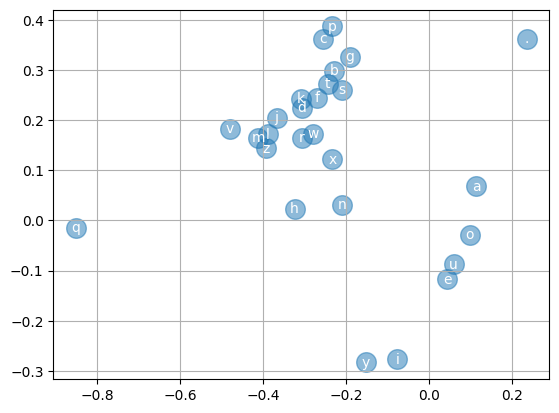

In [18]:
xs, ys = lockup_table[:, 0].data, lockup_table[:, 1].data
plt.scatter(xs, ys, s=200, alpha=0.5)
for i in range(n_word):
    plt.text(xs[i], ys[i], vocabs[i], ha='center', va='center', color='white')
plt.grid('minor')

### Convert this file to md

In [19]:
from IPython.core.display import Javascript

In [22]:
%%js
IPython.notebook.kernel.execute('this_notebook = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [23]:
this_notebook

'2022-11-22-trigram-model.ipynb'

In [24]:
!jupyter nbconvert --to markdown {this_notebook} --output-dir=../_posts

[NbConvertApp] Converting notebook 2022-11-22-trigram-model.ipynb to markdown
[NbConvertApp] Support files will be in 2022-11-22-trigram-model_files/
[NbConvertApp] Making directory ../_posts/2022-11-22-trigram-model_files
[NbConvertApp] Writing 3902 bytes to ../_posts/2022-11-22-trigram-model.md
